<a href="https://www.kaggle.com/code/doghousesam/gold-price-prediction?scriptVersionId=166665962" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import pandas as pd
import numpy as np 
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn 
plt.style.use("Solarize_Light2")

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

# **Data pre processing / cleaning**

In [3]:
gold_data = pd.read_csv("/kaggle/input/gold-price-data/gld_price_data.csv")

**num of rows and columns**

In [4]:
gold_data.head(5)
gold_data.tail(5)
gold_data.shape

(2290, 6)

**Check data types and missing values**

In [5]:
gold_data.info()
gold_data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

**Get basic stats**

In [6]:
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [7]:
## scales are different which explains large differences in STDEV

**Correlation matrix of currency + commodity pairs**

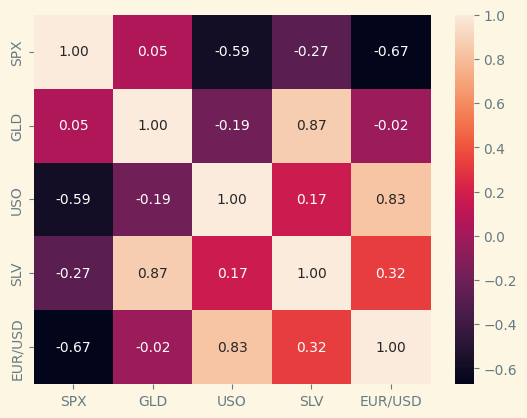

In [8]:
numerical_df = gold_data.drop(["Date"], axis = 1)
correlation_matrix = numerical_df.corr()
sns.heatmap(correlation_matrix,fmt = '.2f', annot = True)
plt.show()

*Strong corr between silver and gold, US oil and EUR/USD. Med positive corr between Silver and EURUSD. Med NEG corr between SPX and EURUSD and Oil and SPX*

**Lets see Corr with Gold**

In [9]:
print(correlation_matrix["GLD"])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


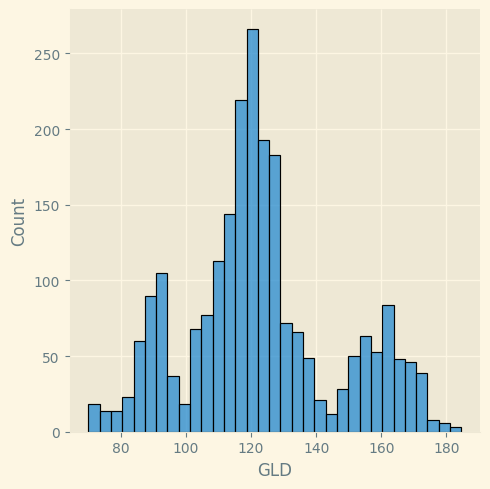

In [10]:
sns.displot(gold_data["GLD"])

**Split our data**

In [11]:
X = gold_data.drop(["Date", "GLD"], axis = 1)
y = gold_data["GLD"]

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 48)

In [13]:
regressor = RandomForestRegressor(n_estimators = 100)

In [14]:
regressor.fit(X_train, y_train)

RandomForestRegressor()

**Evaluate our model based on test data**

In [15]:
y_predictions = regressor.predict(X_test)

In [16]:
print(y_predictions)

[116.67530013 120.69629976 128.76169919 115.77729943 123.85839924
 132.4048038  121.58420018 127.46940115 118.79930089 111.67130109
 107.02790096 109.06209908 122.16763759 119.79900109 120.20630102
 149.11339829 154.18190191 115.53720013 161.9184978  125.1351007
 110.63749882 108.49389907 117.18690109 153.76340039 109.14619882
 165.84040089  89.09680062 102.11119902 117.13039987 115.29690125
 109.02130026 116.41480065 120.22709944 124.91240011  91.69049993
 125.65690142  90.00320029 152.15879865 117.62299923 162.2663016
 114.84679885 120.67660104 119.2709999  159.83479925 158.06650022
  89.73070016 168.58149702 148.39929879 126.34749941 110.60209924
 123.34109964 177.13969758  87.5115996  108.76259825 101.8165997
 154.42199945 108.94420017 104.07989974  92.82709886 116.21010085
 126.84849845 109.83739927 111.15200029 126.37139921 126.79489957
 121.56879855 126.8200994  109.83389772 116.88710118 109.52369951
 110.21239923  86.47339896 121.56020128  87.69509923 126.31309978
 143.15819875

In [17]:
error_score = metrics.r2_score(y_test, y_predictions)
print(error_score)

0.989041358843308


[Text(0.5, 0, 'y_test'), Text(0, 0.5, 'y_predictions')]

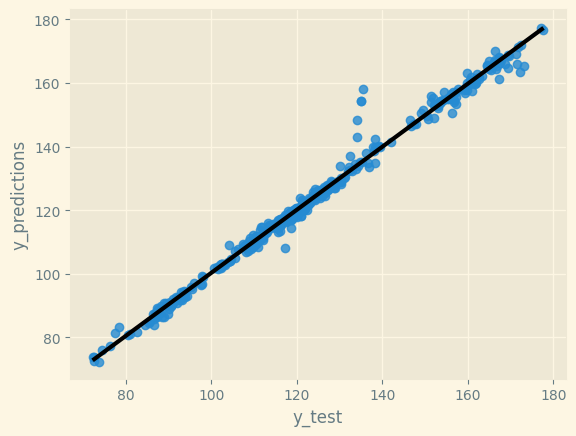

In [18]:
graph = sns.regplot(x = y_test, y = y_predictions, line_kws={"color":"black"})
graph.set(xlabel = "y_test", ylabel = "y_predictions")
